In [1]:
import pandas as pd
import numpy as np

In [87]:
df = pd.DataFrame()
df=pd.read_csv('tasas_med.csv', sep=',')

In [99]:
df.head(100)

,Unnamed: 0,Unnamed: 0.1,ciudad_de_ubicaci_n,fecha_reporte_web,conteo_confirmados,conteo_recuperado,conteo_fallecidos,casos_activos,acumulado_dia_confirmados,acumulado_dia_recuperado,acumulado_dia_fallecidos,acumulado_dia_activos,tasa_contagio,Poblacion_total,tasa_recuperados
0,0,669,Medellín,2020-03-09,1,1.0,0.0,0.0,1,1.0,0.0,0.0,1.700000,2427129,1.000000
1,1,670,Medellín,2020-03-11,2,2.0,0.0,0.0,3,3.0,0.0,0.0,3.000000,2427129,1.000000
2,2,671,Medellín,2020-03-14,2,2.0,0.0,0.0,5,5.0,0.0,0.0,1.666667,2427129,1.000000
3,3,672,Medellín,2020-03-15,1,1.0,0.0,0.0,6,6.0,0.0,0.0,1.200000,2427129,1.000000
4,4,673,Medellín,2020-03-19,3,3.0,0.0,0.0,9,9.0,0.0,0.0,1.500000,2427129,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,764,Medellín,2020-06-22,40,37.0,0.0,3.0,1278,1237.0,15.0,24.0,1.032310,2427129,0.967919
96,96,765,Medellín,2020-06-23,53,51.0,0.0,2.0,1331,1288.0,15.0,26.0,1.041471,2427129,0.967693
97,97,766,Medellín,2020-06-24,83,75.0,4.0,4.0,1414,1363.0,19.0,30.0,1.062359,2427129,0.963932
98,98,767,Medellín,2020-06-25,95,85.0,4.0,5.0,1509,1448.0,23.0,35.0,1.067185,2427129,0.959576


In [89]:
#Guardo mi población inicial en la variable población
poblacion=df.at[0,'Poblacion_total']
poblacion

2427129

In [90]:
suceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
suceptibles=[]
suceptibles = np.insert(suceptibles, 0, suceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(df['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(df['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)


In [91]:
#Promedio movil tasa_contagio para 300 días
for i in range(1,300):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 300 días
for i in range(1,300):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [92]:
i=1

for i in range (1,len(df)+300):
  if activos[i-1]>=suceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*suceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.005,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    suceptibles=np.insert(suceptibles,i,suceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [ ]:
contagios[]

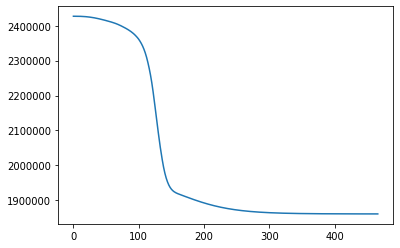

In [93]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(contagios) # plotting by columns
plt.show()

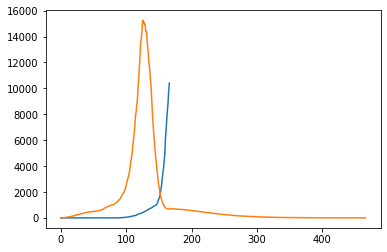

In [94]:
import numpy as np
import matplotlib.pyplot as plt
#plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
plt.plot(df['acumulado_dia_activos'])
plt.plot(contagios) # plotting by columns
plt.show()

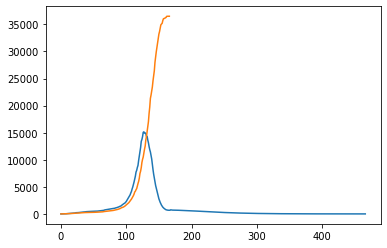

In [97]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(recuperados) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(contagios) # plotting by columns
plt.show()

In [100]:
recuperados[200]

572.470046507166